In [1]:
### Library Imports
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt 
# Function Imports
import sys
sys.path.append('/Users/mburley/TradingIndicators/Functions')  # Add the 'Functions' directory to the Python path
from IndicatorFunctions import import_stock_data, get_ADX, adx_mult_tickers, plot_function
from FilterFunctions import filter_indicators

In [2]:
# Function Call for Multiple Tickers
mult_tick_list = ['AAPL', 'GOOG']
start_date = '2022-01-01'
stock_data2 = import_stock_data(mult_tick_list, start_date)
#print(stock_data2.tail())
adx_df = adx_mult_tickers(stock_data2, mult_tick_list)
print(adx_df.tail())

[*********************100%%**********************]  2 of 2 completed


          AAPL                             GOOG                      
           ADX        DI+        DI-        ADX        DI+        DI-
582  20.160602  41.471171  15.391644  30.611187  45.748987  25.666124
583  19.726139  33.805395  24.029984  28.806485  40.083887  28.391144
584  18.387662  29.297350  24.122288  27.242409  36.080657  25.555684
585  17.874926  27.490958  20.510517  25.886878  33.352488  23.623340
586  23.613241  53.244788  12.933861  24.876474  32.568246  22.488067


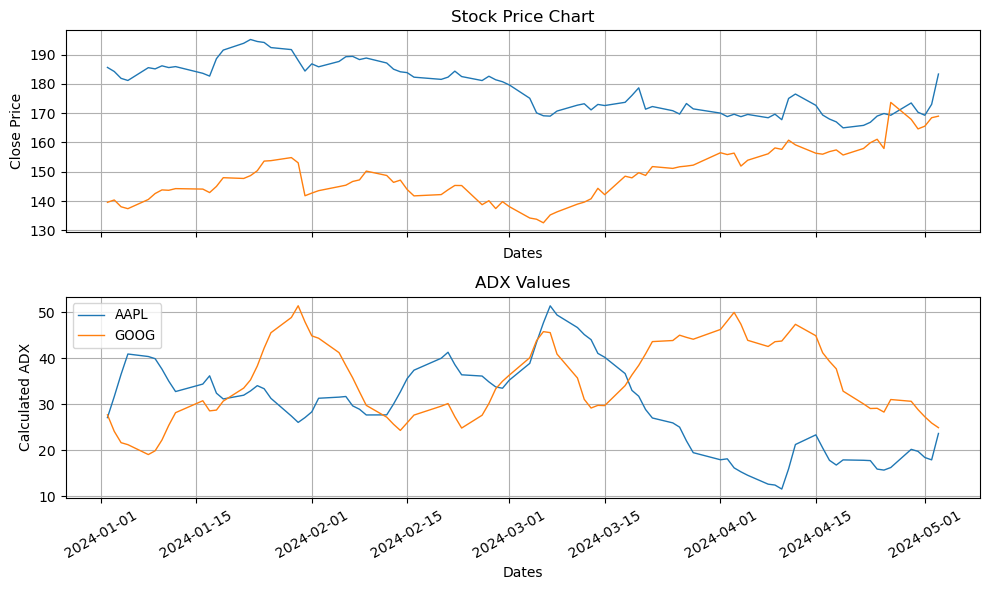

In [3]:
### Plot ADX
# Use .xs() - allows for selection of a specific column level in a MultiIndex DataFrame
plot = plot_function(stock_data2, adx_df.xs('ADX', axis = 1, level = 1), tickers = mult_tick_list, indicator_type = 'ADX')
plot


In [5]:
### Apply Filtering Fuction
# Buy Signal Conditions:
#   - ADX is rising (indicating increasing trend strength) and crosses above a threshold (e.g., 20 or 30).
#   - +DI (DI+) crosses above -DI (DI-), indicating a potential uptrend.
# Sell Signal Conditions:
#   - ADX is falling (indicating weakening trend strength) and crosses below a threshold (e.g., 20 or 30).
#   - -DI (DI-) crosses above +DI (DI+), indicating a potential downtrend.
adx_sell = 25  
adx_buy = 30  
tickers = mult_tick_list

# Create empty Signal cols for each ticker
for t in tickers:
      adx_df[f'{t}_Signal'] = ''
#adx_df.tail(10)

# Filter based on indicator values
for i, row in adx_df.iterrows():
    for t in tickers:
        if row[t, 'ADX'] > adx_buy and row[t, 'DI+'] > row[t, 'DI-']:
            adx_df.loc[i, f'{t}_Signal'] = 'BUY'
        elif row[t, 'ADX'] < adx_sell and row[t, 'DI-'] > row[t, 'DI+']:
            adx_df.loc[i, f'{t}_Signal'] = 'SELL'

adx_df.tail(10)

AAPL                             GOOG                        \
           ADX        DI+        DI-        ADX        DI+        DI-   
577  17.782281  23.521687  33.322526  30.045724  25.433143  19.979450   
578  17.710187  21.335598  30.225554  29.043727  28.202552  17.830878   
579  15.865705  28.266141  26.156412  29.088272  29.009193  15.834959   
580  15.650624  31.015983  23.277720  28.264282  20.447277  32.599391   
581  16.206242  31.294869  20.942578  30.994245  53.900156  18.576000   
582  20.160602  41.471171  15.391644  30.611187  45.748987  25.666124   
583  19.726139  33.805395  24.029984  28.806485  40.083887  28.391144   
584  18.387662  29.297350  24.122288  27.242409  36.080657  25.555684   
585  17.874926  27.490958  20.510517  25.886878  33.352488  23.623340   
586  23.613241  53.244788  12.933861  24.876474  32.568246  22.488067   

    AAPL_Signal GOOG_Signal  
                             
577        SELL         BUY  
578        SELL              
579                          
580                          
581                     BUY  
582                     BUY  
583                          
584                          
585                          
586

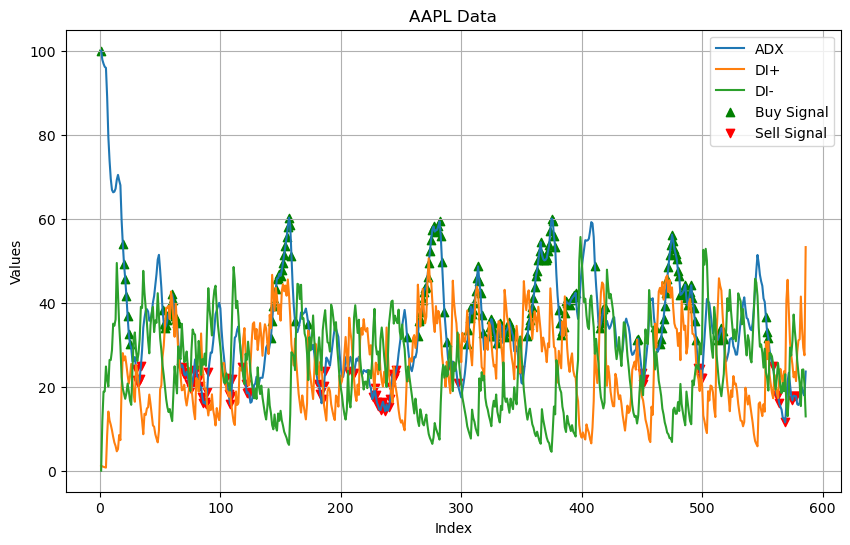

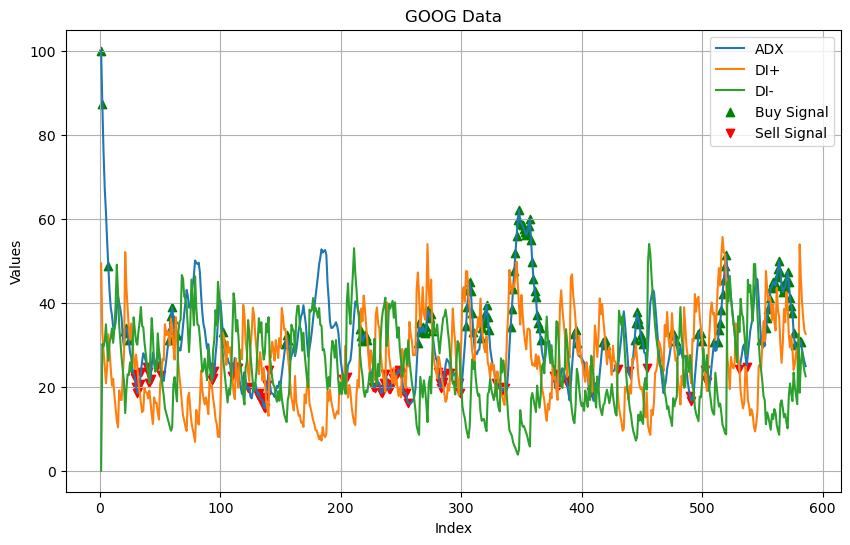

In [10]:
### Plot ADX with Indicators
# Iterate through tickers to plot each ticker's data
for t in tickers:
    plt.figure(figsize=(10, 6))
    plt.plot(adx_df.index, adx_df[t, 'ADX'], label='ADX')
    plt.plot(adx_df.index, adx_df[t, 'DI+'], label='DI+')
    plt.plot(adx_df.index, adx_df[t, 'DI-'], label='DI-')

    # Plot Buy Signals
    buy_indices = adx_df.index[adx_df[f"{t}_Signal"] == 'BUY']
    plt.scatter(buy_indices, adx_df[adx_df[f"{t}_Signal"] == 'BUY'][t, 'ADX'], color='green', marker='^', label='Buy Signal')

    # Plot Sell Signals
    sell_indices = adx_df.index[adx_df[f"{t}_Signal"] == 'SELL']
    plt.scatter(sell_indices, adx_df[adx_df[f"{t}_Signal"] == 'SELL'][t, 'ADX'], color='red', marker='v', label='Sell Signal')

    plt.xlabel('Index')
    plt.ylabel('Values')
    plt.title(f'{t} Data')
    plt.legend()
    plt.grid(True)
    plt.show()